In [18]:
import pandas as pd

bank_df = pd.read_csv('bank.csv', sep= ',')
bank_df.tail(10) # 뒤에서부터 출력하는 메소드
bank_df.head(1) # 앞에서부터 출력하는 메소드, 파라미터가 출력 갯수가 됨, 기본은 5

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN,no


In [20]:
bank_df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [24]:
#결손값의 유무를 확인하는 방법
#행방향에 대해서 결손값 유무 조사, 결손값이 있으면 true, 결손값이 없으면 false
print(bank_df.isnull().any(axis=1))
#열방향에 대해 결손값 유무 조사
print(bank_df.isnull().any(axis=0))
#결손값의 개수 파악
print(bank_df.isnull().sum(axis=1))
print(bank_df.isnull().sum(axis=0))

0        True
1        True
2        True
3        True
4        True
        ...  
7229    False
7230    False
7231    False
7232     True
7233     True
Length: 7234, dtype: bool
age          False
job           True
marital      False
education     True
default      False
balance      False
housing      False
loan         False
contact       True
day          False
month        False
duration     False
campaign     False
pdays        False
previous     False
poutcome      True
y            False
dtype: bool
0       2
1       2
2       2
3       2
4       2
       ..
7229    0
7230    0
7231    0
7232    1
7233    1
Length: 7234, dtype: int64
age             0
job            44
marital         0
education     273
default         0
balance         0
housing         0
loan            0
contact      2038
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome     5900
y               0
dtype: int64


In [25]:
#데이터형이 수치인 항목의 통계랑 계산
bank_df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,7234.000000,7234.000000,7234.000000,7234.000000,7234.000000,7234.000000,7234.000000
mean,40.834808,1374.912911,15.623860,262.875311,2.713989,40.277716,0.565939
std,10.706442,3033.882933,8.307826,268.921065,2.983740,99.188008,1.825100
min,2.000000,-3313.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,74.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,453.500000,16.000000,183.000000,2.000000,-1.000000,0.000000
75%,48.000000,1470.750000,21.000000,321.750000,3.000000,-1.000000,0.000000
max,157.000000,81204.000000,31.000000,3366.000000,44.000000,850.000000,40.000000


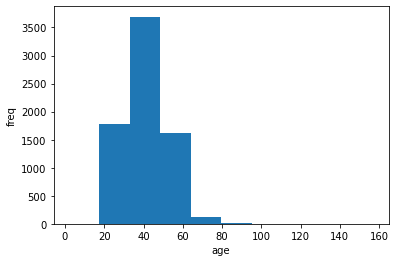

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline
#히스토그램 그리기
plt.hist(bank_df['age'])
plt.xlabel('age')
plt.ylabel('freq')
plt.show()

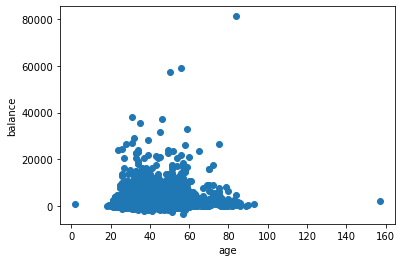

,age,balance
age,1.000000,0.112364
balance,0.112364,1.000000


In [27]:
#데이터 선택하기
plt.scatter(bank_df['age'],bank_df['balance'])
#라벨 명 붙이기
plt.xlabel('age')
plt.ylabel('balance')
plt.show()
#둘 사이의 상관계수 분석
bank_df[['age','balance']].corr()

In [30]:
#원 그래프 작성하기
#value_counts를 통해 값의 갯수를 카운트, ascending은 발생횟수를 내립차순으로 정렬, normalize는 발생횟수가 1이 되도록 정규화
bank_df['job'].value_counts(ascending=False, normalize = True)

management       0.216968
blue-collar      0.208484
technician       0.167733
admin.           0.115994
services         0.091933
retired          0.048818
self-employed    0.035605
entrepreneur     0.033241
unemployed       0.031015
housemaid        0.028929
student          0.021280
Name: job, dtype: float64

C:\Users\rjqnr\anaconda3\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  after removing the cwd from sys.path.


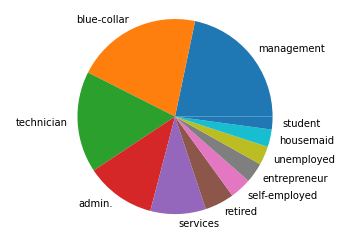

In [32]:
job_label = bank_df['job'].value_counts(ascending=False, normalize = True).index
job_val = bank_df['job'].value_counts(ascending=False, normalize = True)

plt.pie(job_val, labels = job_label)
plt.axis('equal')
plt.show()

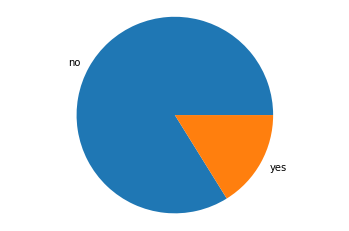

In [36]:
loan_label = bank_df['loan'].value_counts(ascending = False, normalize = True).index
loan_value = bank_df['loan'].value_counts(ascending = False, normalize = True)

plt.pie(loan_value, labels = loan_label)
plt.axis('equal')
plt.show()

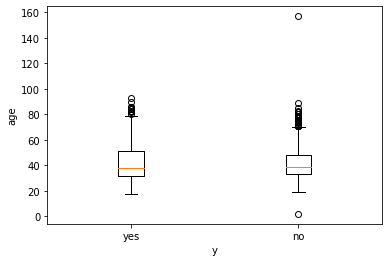

In [40]:
#상자수염 그림
y_yes = bank_df[bank_df['y'] == 'yes']
y_no = bank_df[bank_df['y'] == 'no']
y_age = [y_yes['age'], y_no['age']]

plt.boxplot(y_age)
plt.xlabel('y')
plt.ylabel('age')
ax = plt.gca()
plt.setp(ax, xticklabels = ['yes','no'])
plt.show()